# Check an ROI

In [2]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_6years/uw970'))
from uw.like2 import process, main, roimodel, sedfuns 
map( reload,        (process, main, roimodel, sedfuns));

In [3]:
r= process.Process('.', special_flag=False, finish=False, betafix_flag=False, repivot_flag=False,
                   residual_flag=False, update_positions_flag=False)

Using configuration file "config.txt" in folder: /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P301_6years/uw970/.
Opening dataset P301_6years from key in /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/dataspec.py
invoking Data.setPhotonBinner for front/back event types...
Extracting DSS from existing binfile
GTI from binfile Gti: 38437 intervals from 239557417 to 428689918, on time 150881091
Verified binfile /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/P8_P301/6years_4bpd.fits
no header info in ltcube?
Accepting ltcube without DSS info since legacy specified
Failed gti check:
  ltcube: Gti: 37884 intervals from 239557417 to 428689918, on time 150902856 
 binfile: Gti: 38437 intervals from 239557417 to 428689918, on time 150881091
loading binfile /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/P8_P301/6years_4bpd.fits ... found 162070183 photons in 40 bands, energies 10-1000000 MeV
dataset "P301_6years", found in /afs/slac/g/glast/groups/catalog//pointlike/fe

In [1]:
rois=[ 648]
r.setup_roi(rois[0])
r.summarize()

NameError: name 'r' is not defined

5 calls, function value, improvement, quality: 213843.2, 0.01, 2.01
Name                  index     value  error(%)  gradient
PSR J1705-1906_Norm       8 1.111e-11     108.5       0.1
              _Index      9   0.05478    2235.7       2.0
              _Cutoff    10     461.2      53.0       1.6


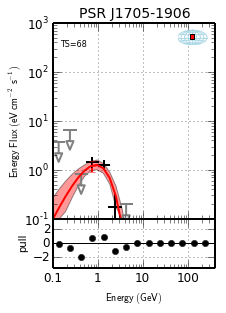

In [5]:
sn='*1906' #*1373'#
#r.freeze('beta', sn) #, 4.9)# 1.2)
r.thaw('Cutoff',sn)
r.fit(sn)#, setpars={ 3:1.0 })
r.plot_sed();

In [93]:
r.repivot(max_beta=5.0)#[r.get_source('*4736')])


check need to repivot sources with TS>10, beta<5.0: 
source                     TS        e0      pivot
processing 5 sources
P86Y3914                   55     16928     17704  converged
P86Y3892                   28      3058      2998  converged
S966-886                   20      2653      2676  converged
P86Y3908                   77      2154      2114  converged
PSR J1705-1906             68       804       766  converged


False

In [94]:
r.process()

2015-06-22 23:32:44 - HP12_0648 - interactive
------------------------------------------------------------------------------------------ 
	 Nearby sources within 5.0 degrees before fit, logL=213843
name               dist        ra       dec        TS eflux(eV)    index   energy   beta/b
PSR J1705-1906      0.6   256.391   -19.190        68       2.3*    0.06*     463*    1
P86Y3892            0.8   256.724   -19.591        28       2.3*    2.11*    3058     0
P86Y3908            1.2   257.983   -19.365        77       3.9*    2.17!    2154     0
S966-886            1.9   257.551   -20.529        20       1.9*    2.21*    2653     0
P86Y3914            2.3   258.528   -20.477        55       2.9*    1.44*   16928     0
S966-901            2.7   257.303   -21.452                 0.8     1.49     4701     1.39 
P86Y3843            2.9   254.244   -20.188                 6.4     1.89     3547     0
P86Y3947            3.2   260.198   -19.647                 2.8     2.24     2416     0
S96

In [200]:
#r.freeze('beta', '*')
r.fit([11,12,13], setpars={13:0.2})

13 13 4.48392441051 --> 0.2
Failed log likelihood estimate, returning 99.: 
63 calls, function value, improvement, quality: 150827.2, 27.63, 0.01
Name                  index     value  error(%)  gradient
P86Y1384_Norm            11 2.968e-13      23.6      -0.0
        _Index           12     1.983      12.5       0.7
        _beta            13    0.1712      82.5      -0.0


In [54]:
r.fit()

Minimizer warning: bad errors for values ['P967-462_Index' 'P967-462_beta']
5 calls, function value, improvement, quality: 1165606.8, 0.08, 3.16
Name                  index     value  error(%)  gradient
P86Y4111_Norm             0 4.747e-13      24.7      -0.3
        _Index            1     2.717       8.9       0.2
PSR J1747-2958_Norm       2 3.499e-11       6.0      -3.5
              _Index      3     2.331       3.6       7.1
              _Cutoff     4      6521      24.9       5.8
P967-548_Norm             5 2.491e-12      30.1      -0.3
        _Index            6     3.017      35.9       0.0
P86Y4089_Norm             7 1.365e-12      23.0      -1.6
        _Index            8     2.697       7.6      -0.5
P86Y4067_Norm             9 2.014e-11       2.7     -26.2
        _Index           10     2.051       2.1       4.4
        _beta            11    0.1711      15.0      27.2
P86Y4088_Norm            12 1.069e-12      21.4      -3.0
        _Index           13     2.771      

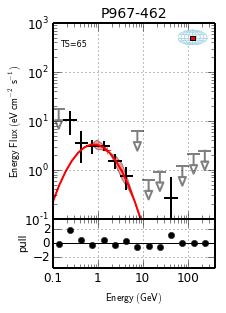

In [55]:
r.plot_sed();

In [62]:
m=r.get_model();
mc = m.copy(); mc

Norm      : (1 + 0.557 - 0.358) (avg = 0.446) 8.05e-14   
Index     : (1 + 0.158 - 0.158) (avg = 0.158) 2.67       
beta      : (1 + 0.000 - 0.000) (avg = 0.000) 0          (FROZEN)
E_break   : (1 + 0.000 - 0.000) (avg = 0.000) 2.19e+03   (FROZEN)
Ph. Flux  : (1 + 1.822 - 0.646) (avg = 1.084) 1.85e-08   (DERIVED)
En. Flux  : (1 + 1.067 - 0.516) (avg = 0.742) 7.34e-12   (DERIVED)

In [69]:
r.ts_beta()

3 calls, function value, improvement, quality: 1165599.0, 0.00, 0.00
Name                  index     value  error(%)  gradient
S966-2102_Norm           17 8.146e-14      45.1      -0.1
         _Index          18     2.787      14.4       0.0
3 calls, function value, improvement, quality: 1165599.0, 0.00, 0.00
Name                  index     value  error(%)  gradient
S966-2102_Norm           17 8.176e-14      50.6       0.1
         _Index          18     2.787      14.7       0.1
         _beta           19 -0.001446   15496.4       0.0


0.00032309535890817642

In [54]:
r.get_model()

Norm      : (1 + 0.129 - 0.114) (avg = 0.121) 2.53e-12   
Index     : (1 + 0.039 - 0.039) (avg = 0.039) 2.63       
beta      : (1 + 0.467 - 0.467) (avg = 0.467) 0.445      
E_break   : (1 + 0.000 - 0.000) (avg = 0.000) 1.11e+03   (FROZEN)
Ph. Flux  : (1 + 0.933 - 0.483) (avg = 0.671) 2.34e-08   (DERIVED)
En. Flux  : (1 + 0.399 - 0.285) (avg = 0.337) 1.56e-11   (DERIVED)

In [58]:
m=r.get_model('*4104'); m

Norm      : (1 + 0.000 - 0.000) (avg = 0.000) 1e-16      
Index     : (1 + 0.000 - 0.000) (avg = 0.000) 4.93       
beta      : (1 + 0.355 - 0.355) (avg = 0.355) 0.752      
E_break   : (1 + 0.000 - 0.000) (avg = 0.000) 1.11e+03   (FROZEN)
Ph. Flux  : (1 + 1.570 - 0.611) (avg = 0.979) 1.53e-11   (DERIVED)
En. Flux  : (1 + 1.090 - 0.522) (avg = 0.754) 4.96e-15   (DERIVED)

In [55]:
r.TS()

178.59564345888793

In [73]:
r.process()

2015-06-18 06:50:14 - HP12_0888 - interactive
---Updating positions---
name               TS    qual delta_ts
P86Y4111            42    3.4  -0.1  SkyDir(269.391,-31.489) -> SkyDir(269.391,-31.489), moved 0.00
PSR J1747-2958    3909    0.0   0.1  SkyDir(266.811,-29.984) -> SkyDir(266.811,-29.984), moved 0.00
P967-548            28    0.6   0.1  SkyDir(270.989,-29.144) -> SkyDir(270.989,-29.144), moved 0.00
P86Y4089            50    2.8   0.0  SkyDir(267.407,-31.749) -> SkyDir(267.407,-31.749), moved 0.00
P86Y4067          6821    0.0   1.0  SkyDir(266.402,-29.010) -> SkyDir(266.402,-29.010), moved 0.00
P86Y4088           137    2.3  -0.0  SkyDir(267.257,-29.288) -> SkyDir(267.257,-29.288), moved 0.00
P86Y4120            27    0.8  -0.1  SkyDir(269.933,-29.875) -> SkyDir(269.933,-29.875), moved 0.00
S966-2102           14    3.8   0.2  SkyDir(270.127,-29.193) -> SkyDir(270.127,-29.193), moved 0.00
P86Y4104           203    0.3   0.1  SkyDir(268.607,-29.538) -> SkyDir(268.607,-29.538), m

TypeError: float argument required, not NoneType

In [215]:
!zip -f pickle.zip

freshening: pickle/HP12_0888.pickle (deflated 69%)


TSplot: filling 224 pixels (size=1.01, npix=15)...


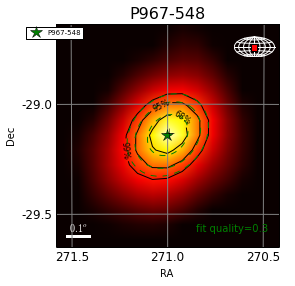

In [33]:
from uw.like2.plotting import tsmap; reload(tsmap)
r.plot_tsmap('*548')# size=2.0, pixelsize=2.0/15);

TSplot: filling 224 pixels (size=1.52, npix=15)...


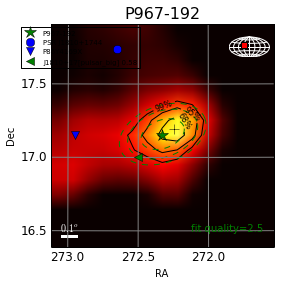

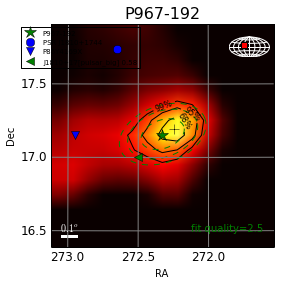

In [15]:
r.plot_tsmap('*192'):

In [7]:
ns =r.add_source(name='P86Y4169X', skydir=(272.95, 17.15))

In [16]:
r.summarize()

current likelihood, est. diff to peak: 172512.9, 3.32
Name                  index     value  error(%)  gradient
P86Y4199_Norm             0 9.157e-14      23.6      -0.9
        _Index            1     2.179       8.3       0.6
PSR J1810+1744_Norm       2 8.013e-12      11.3       4.5
              _Index      3     1.959       8.6       0.3
              _Cutoff     4      3986      36.3       2.9
P86Y4219_Norm             5 1.212e-12      25.9      -1.1
        _Index            6     2.701       9.2      -0.4
P967-192_Norm             7 6.344e-12     214.9      -0.2
        _Index            8   -0.4732     500.5      -0.1
        _Cutoff           9     439.1      74.8       0.9
P86Y4169_Norm            10  1.11e-13      20.2       0.0
        _Index           11     2.114       7.7       1.7
P86Y4169X_Norm           12 1.821e-13     137.1      -4.0
         _Index          13     2.618      23.5      -1.9


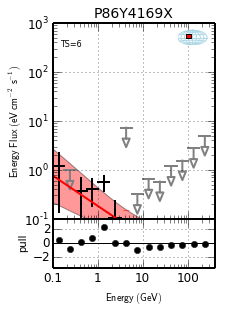

In [18]:
r.plot_sed('*X');

In [14]:
r.fit()

7 calls, function value, improvement, quality: 172512.9, 1.05, 3.32
Name                  index     value  error(%)  gradient
P86Y4199_Norm             0 9.157e-14      23.6      -0.9
        _Index            1     2.179       8.3       0.6
PSR J1810+1744_Norm       2 8.013e-12      11.3       4.5
              _Index      3     1.959       8.6       0.3
              _Cutoff     4      3986      36.3       2.9
P86Y4219_Norm             5 1.212e-12      25.9      -1.1
        _Index            6     2.701       9.2      -0.4
P967-192_Norm             7 6.344e-12     214.9      -0.2
        _Index            8   -0.4732     500.5      -0.1
        _Cutoff           9     439.1      74.8       0.9
P86Y4169_Norm            10  1.11e-13      20.2       0.0
        _Index           11     2.114       7.7       1.7
P86Y4169X_Norm           12 1.821e-13     137.1      -4.0
         _Index          13     2.618      23.5      -1.9


In [10]:
r.localize('*4169X')

Localizing source P86Y4169X, tolerance=1.0e-04...
	     moved     delta        ra       dec         a         b      qual
	    0.0000    0.0000  272.9500   17.1500
	    0.1274    0.1274  272.8923   17.0351    0.1512    0.1159    6.4932
	    0.2192    0.3098  273.0061   16.8448    0.4311    0.2667   18.3056
	    0.1078    0.2588  273.0823   16.9243    0.1339    0.1270    9.9145
	    0.0762    0.3078  273.1616   16.9180    0.3325    0.1561   10.7988
	    0.0254    0.3321  273.1721   16.8946    0.6935    0.2198   15.2216
	    0.5446    0.8762  273.5655   16.5014    0.4216    0.2179   11.6989
	    0.0640    0.9372  273.6234   16.4696    0.2589    0.1622   12.3383
	    0.0250    0.9467  273.6475   16.4789    0.1544    0.1145   11.0055
	    0.0437    0.9841  273.6918   16.4686    0.1422    0.0996    4.3682
	    0.0622    1.0449  273.7470   16.4360    0.1582    0.1117    7.3164
	 -attempt to move beyond maxdist=1.0
TS change: 2.86


In [20]:
r.print_summary()

------------------------------------------------------------------------------------------ 
	 Nearby sources within 5.0 degrees HP12_0606
name               dist        ra       dec        TS eflux(eV)    index   energy   beta/b
P86Y4199            0.7   274.190    17.829        66       2.8*    2.18!    2122     0
PSR J1810+1744      0.8   272.654    17.739      1188      13.2*    1.96!    3986*    1
P86Y4169X           0.8   272.950    17.150        10       1.2*    2.62*    1000     0
P967-192            1.2   272.329    17.152        24       1.0*   -0.47!     439*    1
P86Y4169            1.8   272.757    16.144       105       3.5*    2.11!    2164     0
P86Y4219            2.4   275.360    16.239        39       3.1*    2.70!     682     0
P86Y4163            3.1   272.345    20.722                 2.2     1.86     4537     0
P86Y4210            4.0   274.787    21.572                 2.4     1.97     3424     0
P86Y4165            4.2   272.531    21.922                 1.0    

In [95]:
!zip -f pickle.zip

freshening: pickle/HP12_1135.pickle (deflated 70%)
freshening: pickle/HP12_0891.pickle (deflated 70%)
freshening: pickle/HP12_0885.pickle (deflated 69%)
freshening: pickle/HP12_0648.pickle (deflated 71%)
